**Step 2: Loading and Exploring the New Data**

This step is very similar to your previous project, we just need to adjust for the new column names and labels.

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# Load the datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [143]:
# The columns are named differently. Let's rename them to match your old project.
# Column 1 is the label, Column 2 is the title, Column 3 is the text.
df_train.columns = ['label', 'title', 'text']
df_test.columns = ['label', 'title', 'text']

In [144]:
# --- IMPORTANT: Label Mapping ---
# In this dataset, the labels are 1, 2, 3, 4.
# 1: World, 2: Sports, 3: Business, 4: Sci/Tech
# Let's create a mapping for later use.
class_mapping = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}

Training Data Distribution:
3    30000
4    30000
2    30000
1    30000
Name: label, dtype: int64


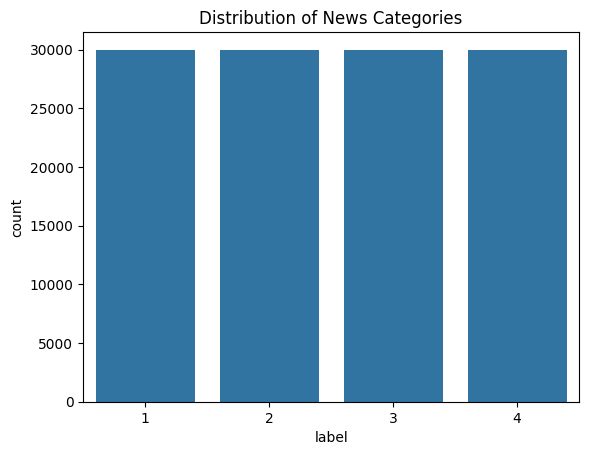

,label,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [145]:
# Let's check the class distribution
print("Training Data Distribution:")
print(df_train['label'].value_counts())

sns.countplot(x='label', data=df_train)
plt.title("Distribution of News Categories")
plt.show()

df_train.head()

In [146]:
# --- Create Subsets ---
df_train = df_train.head(20000).copy()
df_test = df_test.head(6000).copy()

print(f"Using {len(df_train)} samples for training and {len(df_test)} for testing.")

Using 20000 samples for training and 6000 for testing.


Training Data Distribution:
1    5227
4    5126
2    4982
3    4665
Name: label, dtype: int64


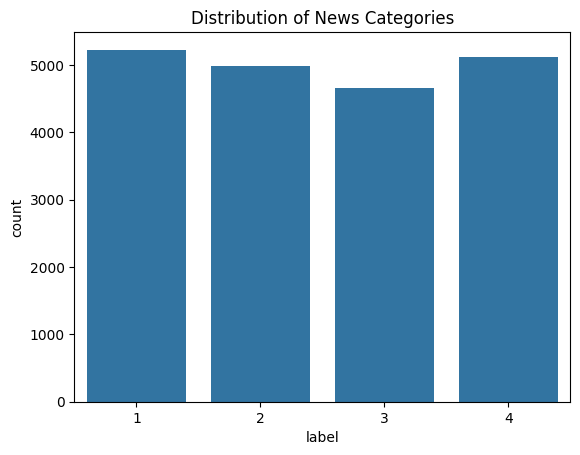

,label,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [147]:
# Let's check the class distribution
print("Training Data Distribution:")
print(df_train['label'].value_counts())

sns.countplot(x='label', data=df_train)
plt.title("Distribution of News Categories")
plt.show()

df_train.head()

**Step 3: Text Preprocessing (Using YOUR Existing Code)**

This is the best part. Your existing preprocessing functions are perfect for this task. You don't need to change anything. Just copy and paste them directly.

In [103]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [71]:
# Make sure you have the NLTK data downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [149]:
def tokenize_remove_stopwords_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(processed_tokens)

In [150]:
def preprocess_text(text):
    clean = clean_text(text)
    processed = tokenize_remove_stopwords_and_lemmatize(clean)
    return processed

In [151]:
# Combine title and text
print("Combining title and text...")
df_train['combined_text'] = df_train['title'] + ' ' + df_train['text']
df_test['combined_text'] = df_test['title'] + ' ' + df_test['text']

Combining title and text...


In [152]:
# Apply the preprocessing function
print("Preprocessing text... (This may take a few minutes)")
df_train['processed_text'] = df_train['combined_text'].apply(preprocess_text)
df_test['processed_text'] = df_test['combined_text'].apply(preprocess_text)

print("Preprocessing complete!")
df_train.head()

Preprocessing text... (This may take a few minutes)
Preprocessing complete!


,label,title,text,combined_text,processed_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,wall st bear claw back black reuters reuters s...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look toward commercial aerospace reute...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stock outlook reuters reuter...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipeline re...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",oil price soar alltime record posing new menac...


In [110]:
df_train.shape

(20000, 5)

In [111]:
df_test.shape

(6000, 5)

**Step 4: Feature Extraction & Training Classical ML Models**

Before we even touch deep learning, we'll build and evaluate the models from your base project. Classical models can't work on raw text, so we'll use TF-IDF to convert the processed text into numerical features, just like you did before.

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [114]:
# Prepare data for Scikit-learn
X_train_text = df_train['processed_text']
y_train_labels = df_train['label'] - 1
X_test_text = df_test['processed_text']
y_test_labels = df_test['label'] - 1

In [115]:
# --- TF-IDF Vectorization (Same as your base project) ---
print("Creating TF-IDF features for classical models...")
tfidf = TfidfVectorizer(max_features=5000) # Using 5000 features is a good practice
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)
print("TF-IDF features created successfully.")

Creating TF-IDF features for classical models...
TF-IDF features created successfully.


In [116]:
# --- Define Models (Same as your base project) ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Multinomial NB': MultinomialNB()
}


In [119]:
# ...existing code...
results_ml = {}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_tfidf, y_train_labels)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_labels, y_pred)
    f1_macro = f1_score(y_test_labels, y_pred, average='macro')
    f1_weighted = f1_score(y_test_labels, y_pred, average='weighted')
    
    # Store the model and its metrics
    results_ml[name] = {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'model': model
    }
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"F1 Score (macro): {f1_macro:.4f}")
    print(f"F1 Score (weighted): {f1_weighted:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_labels, y_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))
# ...existing code...


--- Training Logistic Regression ---
Accuracy: 87.75%
F1 Score (macro): 0.8772
F1 Score (weighted): 0.8774
Classification Report:
              precision    recall  f1-score   support

       World       0.89      0.87      0.88      1519
      Sports       0.93      0.94      0.94      1493
    Business       0.85      0.82      0.83      1470
    Sci/Tech       0.84      0.88      0.86      1518

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000


--- Training Random Forest ---
Accuracy: 83.98%
F1 Score (macro): 0.8393
F1 Score (weighted): 0.8393
Classification Report:
              precision    recall  f1-score   support

       World       0.85      0.83      0.84      1519
      Sports       0.88      0.92      0.90      1493
    Business       0.83      0.78      0.81      1470
    Sci/Tech       0.80      0.82      0.81      1518

    accuracy                         

**Step 4: Preparing Data for the Deep Learning Model**

Here, we have a few minor but important changes to handle the multi-class labels.

Next, we'll write code to load these vectors into a format our model can use.

In [121]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [ ]:
# Download GloVe embeddings (100-dimensional version is a good balance of size and power)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

In [122]:
# Prepare data for Keras (Tokenization and Padding)
X_train_dl = df_train['processed_text']
y_train_dl = to_categorical(df_train['label'] - 1, num_classes=4)
X_test_dl = df_test['processed_text']
y_test_dl = to_categorical(df_test['label'] - 1, num_classes=4)

In [123]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_dl)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train_dl), maxlen=100)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test_dl), maxlen=100)
vocab_size = min(5000, len(tokenizer.word_index) + 1)

In [124]:
# --- Create the GloVe Embedding Matrix ---
print("\nLoading GloVe embeddings and creating embedding matrix...")
embedding_dim = 100
embeddings_index = {}
with open(f'glove.6B.{embedding_dim}d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs


Loading GloVe embeddings and creating embedding matrix...


In [125]:
# Prepare the matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print("Embedding matrix created successfully.")

Embedding matrix created successfully.


Step 4: The Enhanced Deep Learning Competition

Now we define our more complex model architecture and run the competition. The key changes are using the embedding_matrix and stacking recurrent layers.

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout

def create_enhanced_nn_model(model_type, vocab_size, embedding_dim, max_length, embedding_matrix):
    """
    Creates a more powerful neural network with pre-trained embeddings and stacked layers.
    """
    model = Sequential()
    
    # Use the pre-trained GloVe embeddings
    model.add(Embedding(
        vocab_size,
        embedding_dim,
        weights=[embedding_matrix], # The key change!
        input_length=max_length,
        trainable=False # We freeze the embeddings to prevent them from changing
    ))
    
    model.add(Dropout(0.4))

    # --- Enhanced Architecture: Stacked Recurrent Layers ---
    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True)) # return_sequences allows stacking
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True))
        model.add(LSTM(32))
    elif model_type == 'Bi-RNN':
        model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
        model.add(Bidirectional(SimpleRNN(32)))
    elif model_type == 'Bi-LSTM':
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
        model.add(Bidirectional(LSTM(32)))
    
    # Common Dense Layers
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [156]:
# --- Run the Enhanced DL Gauntlet ---
nn_model_types = ['RNN', 'LSTM', 'Bi-RNN', 'Bi-LSTM']
results_dl = {}

for model_type in nn_model_types:
    print(f"\n{'='*20}\n--- Training {model_type} Model ---\n{'='*20}")
    
    model = create_enhanced_nn_model(model_type, vocab_size, embedding_dim, 100, embedding_matrix)
    
    history = model.fit(
        X_train_pad, y_train_dl,
        epochs=5,
        batch_size=64,
        validation_split=0.1,
        verbose=1
    )
    
    loss, accuracy = model.evaluate(X_test_pad, y_test_dl, verbose=0)
    print(f"\n {model_type} Test Accuracy: {accuracy*100:.2f}%")
    results_dl[f"{model_type}"] = {'accuracy': accuracy, 'model': model}


--- Training RNN Model ---
Epoch 1/5


282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.4825 - loss: 1.1638 - val_accuracy: 0.7735 - val_loss: 0.6555
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8013 - loss: 0.6172 - val_accuracy: 0.8455 - val_loss: 0.4648
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7999 - loss: 0.5994 - val_accuracy: 0.8435 - val_loss: 0.4756
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8150 - loss: 0.5716 - val_accuracy: 0.8370 - val_loss: 0.4858
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8275 - loss: 0.5365 - val_accuracy: 0.8625 - val_loss: 0.4356

 RNN Test Accuracy: 84.57%

--- Training LSTM Model ---
Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.7228 - loss: 0.7724 - val_accuracy: 0.8830 - val_loss: 0.3842
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.8490 - loss: 0.4679 - val_accuracy: 0.8920 - val_loss: 0.3588
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/st

**Step 6: The Final Showdown - Finding the Overall Best Model**

Now we combine the dictionaries from the classical models (results_ml) and the deep learning models (results_dl) and find the ultimate champion.

In [157]:
# Assuming 'results_ml' dictionary exists from Step 4
all_results = {**results_ml, **results_dl}

# Find the best performing model from all contenders
best_model_name = max(all_results, key=lambda name: all_results[name]['accuracy'])
best_model_info = all_results[best_model_name]
best_model_object = best_model_info['model']

print(f"\n{'='*40}")
print("          MODEL PERFORMANCE SHOWDOWN")
print(f"{'='*40}")

for name, info in all_results.items():
    print(f"{name:<20} | Accuracy: {info['accuracy']*100:.2f}%")

print(f"{'='*40}")
print(f"\n🏆 The overall best performing model is: >> {best_model_name} << with {best_model_info['accuracy']*100:.2f}% accuracy!")
print(f"{'='*40}\n")


          MODEL PERFORMANCE SHOWDOWN
Logistic Regression  | Accuracy: 87.75%
Random Forest        | Accuracy: 83.98%
Decision Tree        | Accuracy: 75.53%
Multinomial NB       | Accuracy: 87.58%
RNN                  | Accuracy: 84.57%
LSTM                 | Accuracy: 87.42%
Bi-RNN               | Accuracy: 83.63%
Bi-LSTM              | Accuracy: 88.28%

🏆 The overall best performing model is: >> Bi-LSTM << with 88.28% accuracy!



**Step 7: The Business Twist - Using the Champion Model**

Finally, we use our flexible get_ad_recommendations function with the winning model, whichever one it may be. This function is robust and works whether the champion is a Scikit-learn model or a Keras model.

In [132]:
# --- Business Logic Layer (Same as before) ---
ad_matching_rules = {
    'World': ['International Travel', 'News Subscriptions', 'Financial Services'],
    'Sports': ['Fitness Equipment', 'Sports Betting Apps', 'Athletic Apparel'],
    'Business': ['B2B Software', 'Financial Investment Firms', 'Luxury Cars'],
    'Sci/Tech': ['Latest Gadgets', 'Cloud Services', 'Software Deals']
}
class_mapping_index = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

# --- The Final, Flexible End-to-End Function ---
def get_ad_recommendations(news_headline, champion_model, champion_name):
    """
    Takes a news headline, predicts its category using the CHAMPION model,
    and recommends relevant ad types.
    """
    processed_headline = preprocess_text(news_headline)
    predicted_class_index = 0

    # The function intelligently handles both Scikit-learn and Keras models
    if champion_name in models: # Check if it's a classical ML model
        transformed_headline = tfidf.transform([processed_headline])
        predicted_class_index = champion_model.predict(transformed_headline)[0]
    else: # Otherwise, it's a DL model
        sequence = tokenizer.texts_to_sequences([processed_headline])
        padded_sequence = pad_sequences(sequence, maxlen=100)
        prediction = champion_model.predict(padded_sequence)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
    
    predicted_category_name = class_mapping_index[predicted_class_index]
    recommended_ads = ad_matching_rules[predicted_category_name]
    
    print(f"Input Headline: '{news_headline}'")
    print(f"--> Model Used: {champion_name} (The Champion!)")
    print(f"--> Predicted News Category: {predicted_category_name}")
    print(f"--> Recommended Ad Categories: {recommended_ads}\n")

# --- Let's Test It with the CHAMPION model! ---
print("--- Ad-Targeting Engine Demonstration ---")
get_ad_recommendations("The government just passed a new bill on international trade.", best_model_object, best_model_name)
get_ad_recommendations("Nvidia announced their new RTX graphics card today, promising a leap in performance.", best_model_object, best_model_name)
get_ad_recommendations("The Lakers won the championship game in a thrilling overtime finish.", best_model_object, best_model_name)

--- Ad-Targeting Engine Demonstration ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
Input Headline: 'The government just passed a new bill on international trade.'
--> Model Used: Enhanced Bi-LSTM (The Champion!)
--> Predicted News Category: Business
--> Recommended Ad Categories: ['B2B Software', 'Financial Investment Firms', 'Luxury Cars']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Input Headline: 'Nvidia announced their new RTX graphics card today, promising a leap in performance.'
--> Model Used: Enhanced Bi-LSTM (The Champion!)
--> Predicted News Category: Sci/Tech
--> Recommended Ad Categories: ['Latest Gadgets', 'Cloud Services', 'Software Deals']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Input Headline: 'The Lakers won the championship game in a thrilling overtime finish.'
--> Model Used: Enhanced Bi-LSTM (The Champion!)
--> Predicted News Category: Sports
--> Recommended Ad Categories: ['Fitness Equipment', 'Sports Betting Apps', 'Athletic Apparel']

